In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
#1. Load train data set
data=pd.read_csv("D:/Dataset/minstCSVDataset/mnistSmall.csv")
print("Data Shape: ",data.shape)
data.head()

Data Shape:  (10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [4]:
# check unique label column
np.unique(data['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [5]:
# count the total number of each digit count
data['label'].value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: label, dtype: int64

Text(0.5, 1.0, 'Mnist Character')

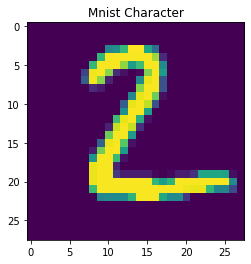

In [6]:
# Display Characters
zero = data.iloc[1, 1:]
zero = zero.values.reshape(28,28)
plt.imshow(zero)
plt.title("Mnist Character")

In [20]:
# 2. Split Dataset in Features and Traget Variables
X=data.iloc[:,1:]
Y=data.iloc[:,0]
#print("X: ",X)
#print("Y: ",Y)

In [21]:
from sklearn.preprocessing import StandardScaler
# 3. If needed , Normalize data
#X = StandardScaler().fit_transform(X)

In [22]:
# 4. Split Dataset into training and Testing sets
Train_X,Test_X, Train_Y,Test_Y =train_test_split(X,Y,test_size=0.2,random_state=1)
print("X_train: ",Train_X.shape)
print("X_test: ",Test_X.shape)
print("Y_train: ",Train_Y.shape)
print("Y_test: ",Test_Y.shape)

X_train:  (8000, 784)
X_test:  (2000, 784)
Y_train:  (8000,)
Y_test:  (2000,)


In [23]:
print(Train_Y)

2694    9
5140    3
2568    0
3671    6
7427    6
       ..
2895    8
7813    9
905     2
5192    2
235     9
Name: label, Length: 8000, dtype: int64


In [24]:
#5. Define the Classifier Model

# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
# C:Regularization parameter. default=1.0. The strength of the regularization is inversely proportional to C. 
# degreeint, default=3. Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
# decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’

model=SVC(kernel='linear', C=30.0,decision_function_shape="ovr")

In [25]:
#6. Train the Model
model=model.fit(Train_X,Train_Y)

In [26]:
#7. Predict the response for test dataset
ypred=model.predict(Test_X)

In [27]:
from sklearn.metrics import accuracy_score 
# 8. Print The Model Accuracy
print("accuracy:", accuracy_score(Test_Y,ypred))

accuracy: 0.929


In [28]:
# Print the Confusion Matrix
#labels = ['Digit 0','Digit 1','Digit 2','Digit 3','Digit 4','Digit 5','Digit 6','Digit 7','Digit 8','Digit 9']
print(confusion_matrix(Test_Y,ypred))

[[191   0   1   1   0   2   0   0   2   0]
 [  0 220   3   2   0   0   1   0   0   0]
 [  3   2 207   2   5   2   2   1   3   1]
 [  0   0   3 188   0   1   0   1   4   1]
 [  0   0   0   1 200   1   0   0   0   2]
 [  2   1   2   6   1 136   3   2   5   1]
 [  1   1   1   0   1   2 176   0   1   0]
 [  1   2   0   2   3   0   0 206   1   5]
 [  0   4   5   4   5   4   2   0 166   2]
 [  0   2   0   1  11   1   1   8   1 168]]


In [29]:
# print the Classification Report
target_names = ['Digit 0','Digit 1','Digit 2','Digit 3','Digit 4','Digit 5','Digit 6','Digit 7','Digit 8','Digit 9']
print(classification_report(Test_Y, ypred, target_names=target_names))

              precision    recall  f1-score   support

     Digit 0       0.96      0.97      0.97       197
     Digit 1       0.95      0.97      0.96       226
     Digit 2       0.93      0.91      0.92       228
     Digit 3       0.91      0.95      0.93       198
     Digit 4       0.88      0.98      0.93       204
     Digit 5       0.91      0.86      0.88       159
     Digit 6       0.95      0.96      0.96       183
     Digit 7       0.94      0.94      0.94       220
     Digit 8       0.91      0.86      0.89       192
     Digit 9       0.93      0.87      0.90       193

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [30]:
model=SVC(kernel='rbf', C=3.0)
model=model.fit(Train_X,Train_Y)
ypred=model.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))

accuracy: 0.9705


In [31]:
print(confusion_matrix(Test_Y,ypred))

[[193   0   0   1   0   2   0   0   1   0]
 [  0 224   2   0   0   0   0   0   0   0]
 [  2   0 219   0   1   0   2   2   2   0]
 [  0   0   0 195   0   0   0   2   1   0]
 [  0   1   0   0 202   0   0   0   0   1]
 [  0   1   0   4   1 149   2   1   1   0]
 [  1   0   0   0   1   0 181   0   0   0]
 [  0   3   0   1   1   0   0 211   1   3]
 [  0   1   2   0   3   1   1   1 183   0]
 [  0   2   0   1   3   0   1   0   2 184]]


In [32]:
print(classification_report(Test_Y, ypred, target_names=target_names))

              precision    recall  f1-score   support

     Digit 0       0.98      0.98      0.98       197
     Digit 1       0.97      0.99      0.98       226
     Digit 2       0.98      0.96      0.97       228
     Digit 3       0.97      0.98      0.97       198
     Digit 4       0.95      0.99      0.97       204
     Digit 5       0.98      0.94      0.96       159
     Digit 6       0.97      0.99      0.98       183
     Digit 7       0.97      0.96      0.97       220
     Digit 8       0.96      0.95      0.96       192
     Digit 9       0.98      0.95      0.97       193

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [33]:
# Nearest Neighbors algorithms
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=7)
knnmodel=knnmodel.fit(Train_X,Train_Y)
ypred=knnmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))

accuracy: 0.946


In [34]:
print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

[[194   0   0   0   0   2   1   0   0   0]
 [  0 225   1   0   0   0   0   0   0   0]
 [  6   5 206   1   0   1   1   5   2   1]
 [  0   0   0 195   0   1   0   1   0   1]
 [  0   6   0   0 189   0   0   0   0   9]
 [  0   1   0   6   0 145   4   1   0   2]
 [  0   1   0   0   0   0 182   0   0   0]
 [  0   4   1   0   1   0   0 209   0   5]
 [  0   4   4   3   3   8   0   3 166   1]
 [  0   3   0   2   4   0   1   2   0 181]]
              precision    recall  f1-score   support

     Digit 0       0.97      0.98      0.98       197
     Digit 1       0.90      1.00      0.95       226
     Digit 2       0.97      0.90      0.94       228
     Digit 3       0.94      0.98      0.96       198
     Digit 4       0.96      0.93      0.94       204
     Digit 5       0.92      0.91      0.92       159
     Digit 6       0.96      0.99      0.98       183
     Digit 7       0.95      0.95      0.95       220
     Digit 8       0.99      0.86      0.92       192
     Digit 9       0.91     

In [35]:
# Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier
rfmodel= RandomForestClassifier(max_depth=None, random_state=0)
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))

accuracy: 0.952


In [36]:
print(classification_report(Test_Y, ypred, target_names=target_names))

              precision    recall  f1-score   support

     Digit 0       0.98      0.98      0.98       197
     Digit 1       0.97      0.99      0.98       226
     Digit 2       0.95      0.93      0.94       228
     Digit 3       0.95      0.95      0.95       198
     Digit 4       0.94      0.97      0.95       204
     Digit 5       0.94      0.91      0.92       159
     Digit 6       0.96      0.98      0.97       183
     Digit 7       0.97      0.94      0.95       220
     Digit 8       0.93      0.93      0.93       192
     Digit 9       0.92      0.92      0.92       193

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [37]:
#1. Load train data set
data=pd.read_csv("D:/Dataset/minstCSVDataset/mnistSmall.csv")
print("Data Shape: ",data.shape)
#data.head()
X=data.iloc[:,1:]
Y=data.iloc[:,0]

Data Shape:  (10000, 785)


In [38]:
# Split Dataset into training and Testing sets
Train_X,Test_X, Train_Y,Test_Y =train_test_split(X,Y,test_size=0.2,random_state=1)
print("X_train: ",Train_X.shape)
print("X_test: ",Test_X.shape)
print("Y_train: ",Train_Y.shape)
print("Y_test: ",Test_Y.shape)

X_train:  (8000, 784)
X_test:  (2000, 784)
Y_train:  (8000,)
Y_test:  (2000,)


In [39]:
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [40]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
from keras.utils import to_categorical
# convert to one-hot vector
Train_Y = to_categorical(Train_Y)
Test_Y = to_categorical(Test_Y)

In [42]:
print(Train_Y)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [43]:
print(Test_Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
# fit the keras model on the dataset
History=model.fit(Train_X,Train_Y,validation_data=(Test_X, Test_Y), epochs=256, batch_size=64,verbose=1)

Epoch 1/256
125/125 [==============================] - 1s 4ms/step - loss: 5.2011 - accuracy: 0.7470 - val_loss: 1.1718 - val_accuracy: 0.8735
Epoch 2/256
125/125 [==============================] - 0s 3ms/step - loss: 0.7030 - accuracy: 0.9045 - val_loss: 0.7647 - val_accuracy: 0.8865
Epoch 3/256
125/125 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.9260 - val_loss: 0.7140 - val_accuracy: 0.9020
Epoch 4/256
125/125 [==============================] - 0s 3ms/step - loss: 0.2096 - accuracy: 0.9571 - val_loss: 0.8055 - val_accuracy: 0.8985
Epoch 5/256
125/125 [==============================] - 0s 3ms/step - loss: 0.1415 - accuracy: 0.9672 - val_loss: 0.6835 - val_accuracy: 0.9200
Epoch 6/256
125/125 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9718 - val_loss: 0.6570 - val_accuracy: 0.9305
Epoch 7/256
125/125 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9786 - val_loss: 0.6225 - val_accuracy: 0.9215

Epoch 58/256
125/125 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9921 - val_loss: 0.6072 - val_accuracy: 0.9490
Epoch 59/256
125/125 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9959 - val_loss: 0.5638 - val_accuracy: 0.9505
Epoch 60/256
125/125 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9973 - val_loss: 0.4884 - val_accuracy: 0.9585
Epoch 61/256
125/125 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9965 - val_loss: 0.5400 - val_accuracy: 0.9520
Epoch 62/256
125/125 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9974 - val_loss: 0.6158 - val_accuracy: 0.9545
Epoch 63/256
125/125 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9937 - val_loss: 0.7188 - val_accuracy: 0.9470
Epoch 64/256
125/125 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9920 - val_loss: 0.7914 - val_accuracy:

Epoch 114/256
125/125 [==============================] - 0s 3ms/step - loss: 2.5009e-06 - accuracy: 1.0000 - val_loss: 0.4481 - val_accuracy: 0.9610
Epoch 115/256
125/125 [==============================] - 0s 4ms/step - loss: 2.3517e-06 - accuracy: 1.0000 - val_loss: 0.4485 - val_accuracy: 0.9610
Epoch 116/256
125/125 [==============================] - 0s 3ms/step - loss: 2.2137e-06 - accuracy: 1.0000 - val_loss: 0.4488 - val_accuracy: 0.9610
Epoch 117/256
125/125 [==============================] - 0s 3ms/step - loss: 2.0828e-06 - accuracy: 1.0000 - val_loss: 0.4492 - val_accuracy: 0.9610
Epoch 118/256
125/125 [==============================] - 0s 3ms/step - loss: 1.9546e-06 - accuracy: 1.0000 - val_loss: 0.4497 - val_accuracy: 0.9605
Epoch 119/256
125/125 [==============================] - 0s 3ms/step - loss: 1.8359e-06 - accuracy: 1.0000 - val_loss: 0.4501 - val_accuracy: 0.9605
Epoch 120/256
125/125 [==============================] - 0s 4ms/step - loss: 1.7264e-06 - accuracy: 1.0000

Epoch 169/256
125/125 [==============================] - 0s 3ms/step - loss: 8.9600e-08 - accuracy: 1.0000 - val_loss: 0.4754 - val_accuracy: 0.9625
Epoch 170/256
125/125 [==============================] - 0s 3ms/step - loss: 8.4057e-08 - accuracy: 1.0000 - val_loss: 0.4760 - val_accuracy: 0.9625
Epoch 171/256
125/125 [==============================] - 0s 3ms/step - loss: 7.9200e-08 - accuracy: 1.0000 - val_loss: 0.4767 - val_accuracy: 0.9625
Epoch 172/256
125/125 [==============================] - 0s 3ms/step - loss: 7.4684e-08 - accuracy: 1.0000 - val_loss: 0.4772 - val_accuracy: 0.9625
Epoch 173/256
125/125 [==============================] - 0s 3ms/step - loss: 7.0229e-08 - accuracy: 1.0000 - val_loss: 0.4778 - val_accuracy: 0.9625
Epoch 174/256
125/125 [==============================] - 0s 3ms/step - loss: 6.6116e-08 - accuracy: 1.0000 - val_loss: 0.4785 - val_accuracy: 0.9625
Epoch 175/256
125/125 [==============================] - 0s 3ms/step - loss: 6.1989e-08 - accuracy: 1.0000

Epoch 224/256
125/125 [==============================] - 0s 3ms/step - loss: 3.1292e-09 - accuracy: 1.0000 - val_loss: 0.5031 - val_accuracy: 0.9630
Epoch 225/256
125/125 [==============================] - 0s 3ms/step - loss: 2.8610e-09 - accuracy: 1.0000 - val_loss: 0.5029 - val_accuracy: 0.9630
Epoch 226/256
125/125 [==============================] - 0s 3ms/step - loss: 2.8014e-09 - accuracy: 1.0000 - val_loss: 0.5032 - val_accuracy: 0.9630
Epoch 227/256
125/125 [==============================] - 0s 3ms/step - loss: 2.5779e-09 - accuracy: 1.0000 - val_loss: 0.5031 - val_accuracy: 0.9630
Epoch 228/256
125/125 [==============================] - 0s 3ms/step - loss: 2.4885e-09 - accuracy: 1.0000 - val_loss: 0.5028 - val_accuracy: 0.9630
Epoch 229/256
125/125 [==============================] - 0s 3ms/step - loss: 2.3544e-09 - accuracy: 1.0000 - val_loss: 0.5031 - val_accuracy: 0.9630
Epoch 230/256
125/125 [==============================] - 0s 3ms/step - loss: 2.3246e-09 - accuracy: 1.0000

In [46]:
# evaluate the keras model
_, train_acc = model.evaluate(Train_X, Train_Y, verbose=0)
print('Training Accuracy: %.2f' % (train_acc*100))

Training Accuracy: 100.00


In [47]:
print(History.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


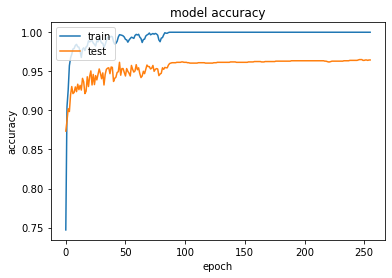

In [48]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

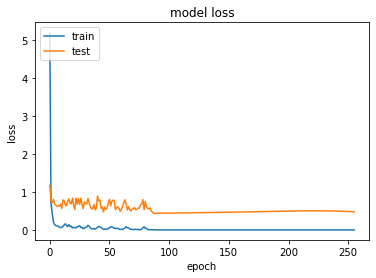

In [49]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()